In [7]:
# Boilerplate at top of file
%load_ext autoreload
%load_ext rmagic
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime
import math

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from ggplot import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic


In [214]:
# Load in the data
# File format uses 'YYYY-MM-DD-HH_Mi_Se'
df_1 = pd.read_csv('data/2015-10-11-13_47_46.csv')
start_time = datetime.datetime(2015, 10, 11, 13, 47, 46)

# df_1 = pd.read_csv('data/2015-10-11-13_53_13.csv')
start_time = datetime.datetime(2015, 10, 11, 13, 53, 13)

n = len(df_1)
print start_time

2015-10-11 13:53:13


In [215]:
df_1['sample_index'] = np.arange(n)
# assume sample times
sample_time = np.mean(df_1['time_diff'])/1000

In [223]:
sample_time

0.019693047337278106

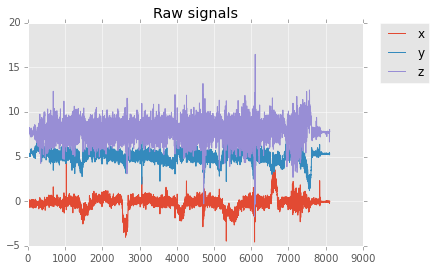

In [224]:
plt.plot(df_1['x'], label='x')
plt.plot(df_1['y'], label='y')
plt.plot(df_1['z'], label='z')
plt.title('Raw signals')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [266]:
from scipy import signal
def smooth_locally(df, col, win_size):
    win = signal.hann(win_size)
    filtered = signal.convolve(df[col], win, mode='same') / sum(win)
    filtered = filtered - np.mean(filtered)
    plt.figure()
    plt.plot(filtered)
    plt.title(col)
    return filtered
    



In [272]:
np.mean(df_1['smooth_accel'])

-9.6350716141039225e-17

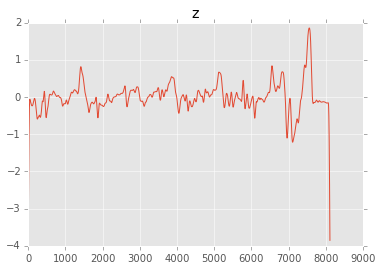

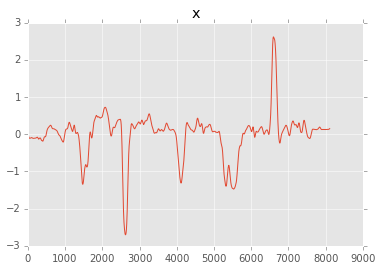

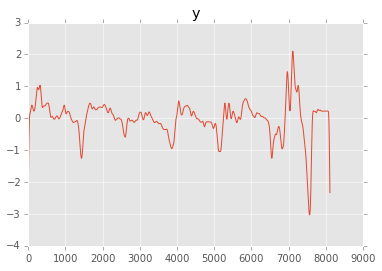

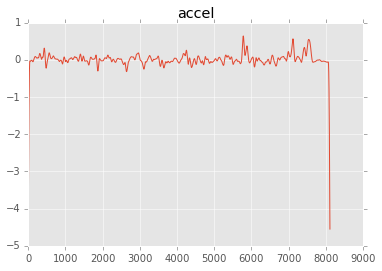

In [273]:
df_1['smooth_z'] = smooth_locally(df_1, 'z', 100)
df_1['smooth_x'] = smooth_locally(df_1, 'x', 100)
df_1['smooth_y'] = smooth_locally(df_1, 'y', 100)
df_1['accel'] = np.sqrt( np.power(df_1['y'], 2)  + 
                           np.power(df_1['z'], 2) )
df_1['smooth_accel'] = smooth_locally(df_1, 'accel', 100)

In [268]:
v0 = 0 # initial velocity

In [269]:
df_1['velocity_x'] = v0 
df_1['velocity_x'] = df_1.shift(1).fillna(0)['velocity_x'] + sample_time*df_1['smooth_x']


df_1['velocity_y'] = v0 
df_1['velocity_y'] = df_1.shift(1).fillna(0)['velocity_y'] + sample_time*df_1['smooth_y']

df_1['velocity_z'] = v0 
df_1['velocity_z'] = df_1.shift(1).fillna(0)['velocity_z'] + sample_time*df_1['smooth_z']

df_1['velocity'] = v0 
df_1['velocity'] = df_1.shift(1).fillna(0)['velocity'] + df_1['time_diff']/1000*df_1['smooth_accel']

There seems to be an error in measurement as the velocity calculated is too low.

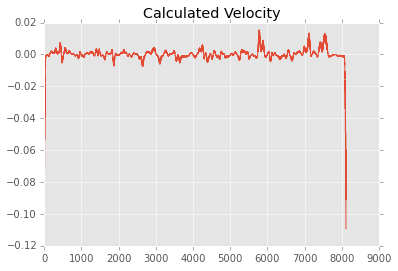

In [274]:
plt.plot(df_1[['velocity']])
plt.title('Calculated Velocity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)